In [1]:
# Databasee + statistics

#from opxrd import OpXRD

#opxrd = OpXRD.load(root_dirpath='/tmp/opxrd')
#opxrd.plot_quantity(attr='primary_phase.spacegroup')
#pattern = opxrd.patterns[0]

import sys

stdout = sys.stdout
from xrdpattern.pattern import XrdPattern

p1fpath = '/home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_0.json'
p2fpath = '/home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_1.json'
p1 = XrdPattern.load(fpath=p1fpath)
p2 = XrdPattern.load(fpath=p2fpath)  

sys.stdout = stdout

--- Successfully processed file ---
Data file path: /home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_0.json
Num critical errors: 0
Num errors: 0
Num warnings: 0


--- Successfully processed file ---
Data file path: /home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_1.json
Num critical errors: 0
Num errors: 0
Num warnings: 0


In [2]:
#Standardize

x1,y1, = p1.get_pattern_data(apply_standardization=True)
print(f'Minimum value of y = {min(y1)}')
print(f'Two theta values start, end at {x1[0]}, {x1[-1]}')

x = [ 5.        5.0303    5.0605   ... 49.938499 49.9688   49.999001]
Minimum value of y = 0.0
Two theta values start, end at 0.0, 90.0


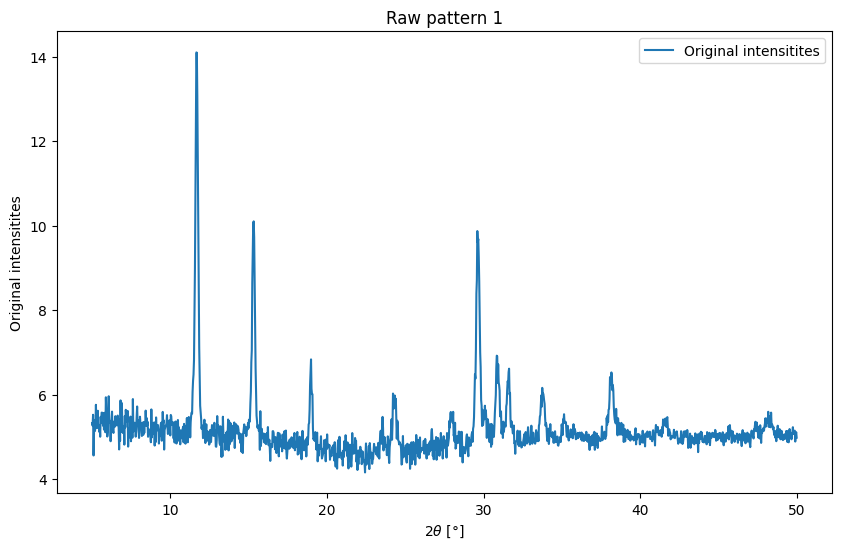

x = [ 5.        5.0303    5.0605   ... 49.938499 49.9688   49.999001]


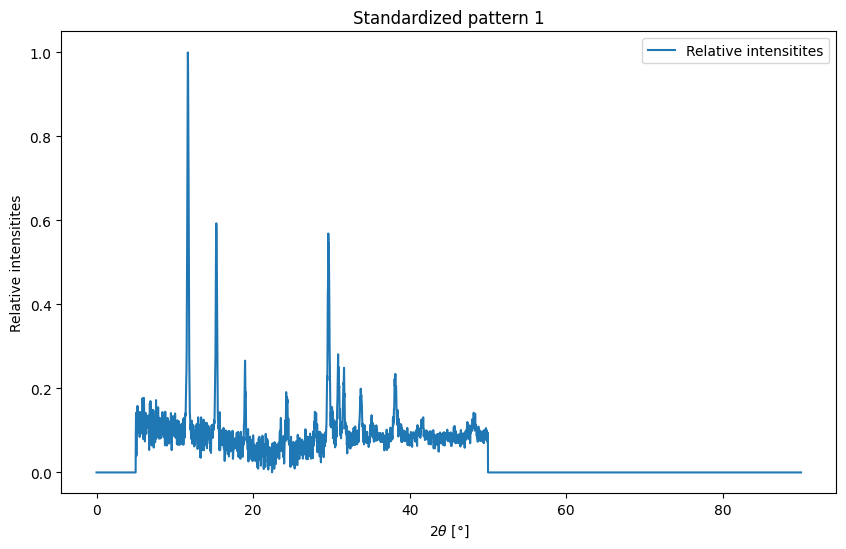

In [3]:
# Plot
p1.plot(title='Raw pattern 1', apply_standardization=False)
p1.plot(title='Standardized pattern 1', apply_standardization=True)

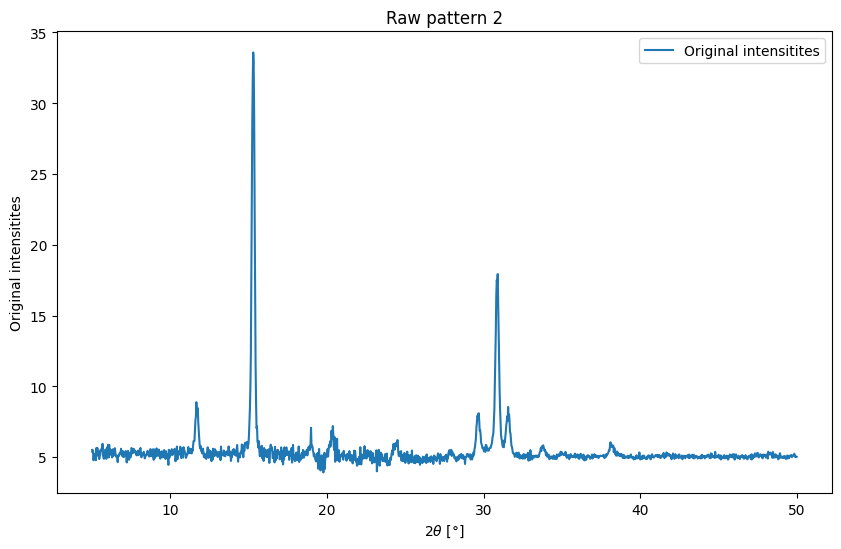

x = [ 5.        5.0303    5.0605   ... 49.938499 49.9688   49.999001]


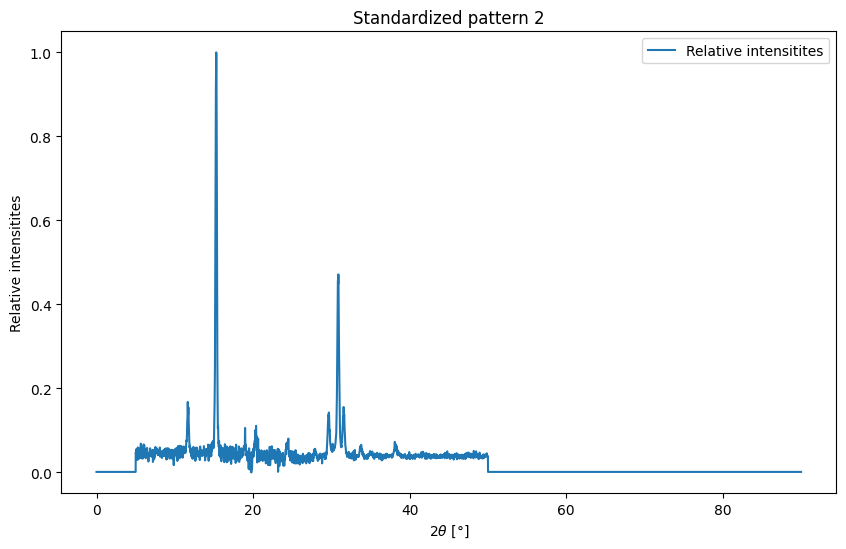

In [4]:
# Plot
p2.plot(title='Raw pattern 2', apply_standardization=False)
p2.plot(title='Standardized pattern 2', apply_standardization=True)

In [5]:
# To tensor
#import torch
#pattern.to_tensorpair(dtype=torch.float32, device=torch.device('cuda'))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from xrdpattern.pattern import PatternDB
from sklearn.decomposition import PCA
from numpy.typing import NDArray

def plot_pattern_dbs(dbs : list[PatternDB]):
    for db in dbs:
        patterns = db.patterns
        xy_list = [p.get_pattern_data() for p in patterns]
        y_list = [y for x,y in xy_list]
        
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(y_list)
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='blue', label=db.name)
        plt.title('PCA: Two Component Scatter Plot')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.show()



In [7]:
db = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/hodge_alwen_0')
plot_pattern_dbs(dbs=[db])

100% (169 of 169) |######################| Elapsed Time: 0:00:00 Time:  0:00:000000


x = [ 30.00313028  30.02939085  30.05565141 ... 110.01309757 110.03935814
 110.0656187 ]


ValueError: `x` must be strictly increasing sequence.